# Clustering Demand

In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [37]:
trips_data = pd.read_csv('data/Taxi_Trips__2024-__20250711.csv', parse_dates = ['Trip Start Timestamp'])

trips_data['Hour'] = trips_data['Trip Start Timestamp'].dt.hour
trips_data['Month'] = trips_data['Trip Start Timestamp'].dt.month
trips_data['Year'] = trips_data['Trip Start Timestamp'].dt.year
trips_data['Trip Minutes'] = trips_data['Trip Seconds'] / 60
 
trips_data = trips_data.drop(columns=['Dropoff Centroid  Location', 'Dropoff Community Area', 'Dropoff Census Tract',
    'Dropoff Centroid Longitude', 'Dropoff Centroid Latitude', 'Pickup Centroid Location', 'Tolls', 'Extras', 
    'Payment Type', 'Company', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Trip Seconds'
    ])

trips_data.dropna(inplace=True)

C:\Users\LIWFG\AppData\Local\Temp\ipykernel_11600\1867128180.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trips_data = pd.read_csv('data/Taxi_Trips__2024-__20250711.csv', parse_dates = ['Trip Start Timestamp'])


In [38]:
trips_data.dtypes

Trip ID                          object
Taxi ID                          object
Trip Start Timestamp     datetime64[ns]
Trip End Timestamp               object
Trip Miles                      float64
Pickup Census Tract             float64
Pickup Community Area           float64
Fare                            float64
Tips                            float64
Trip Total                      float64
Hour                              int32
Month                             int32
Year                              int32
Trip Minutes                    float64
dtype: object

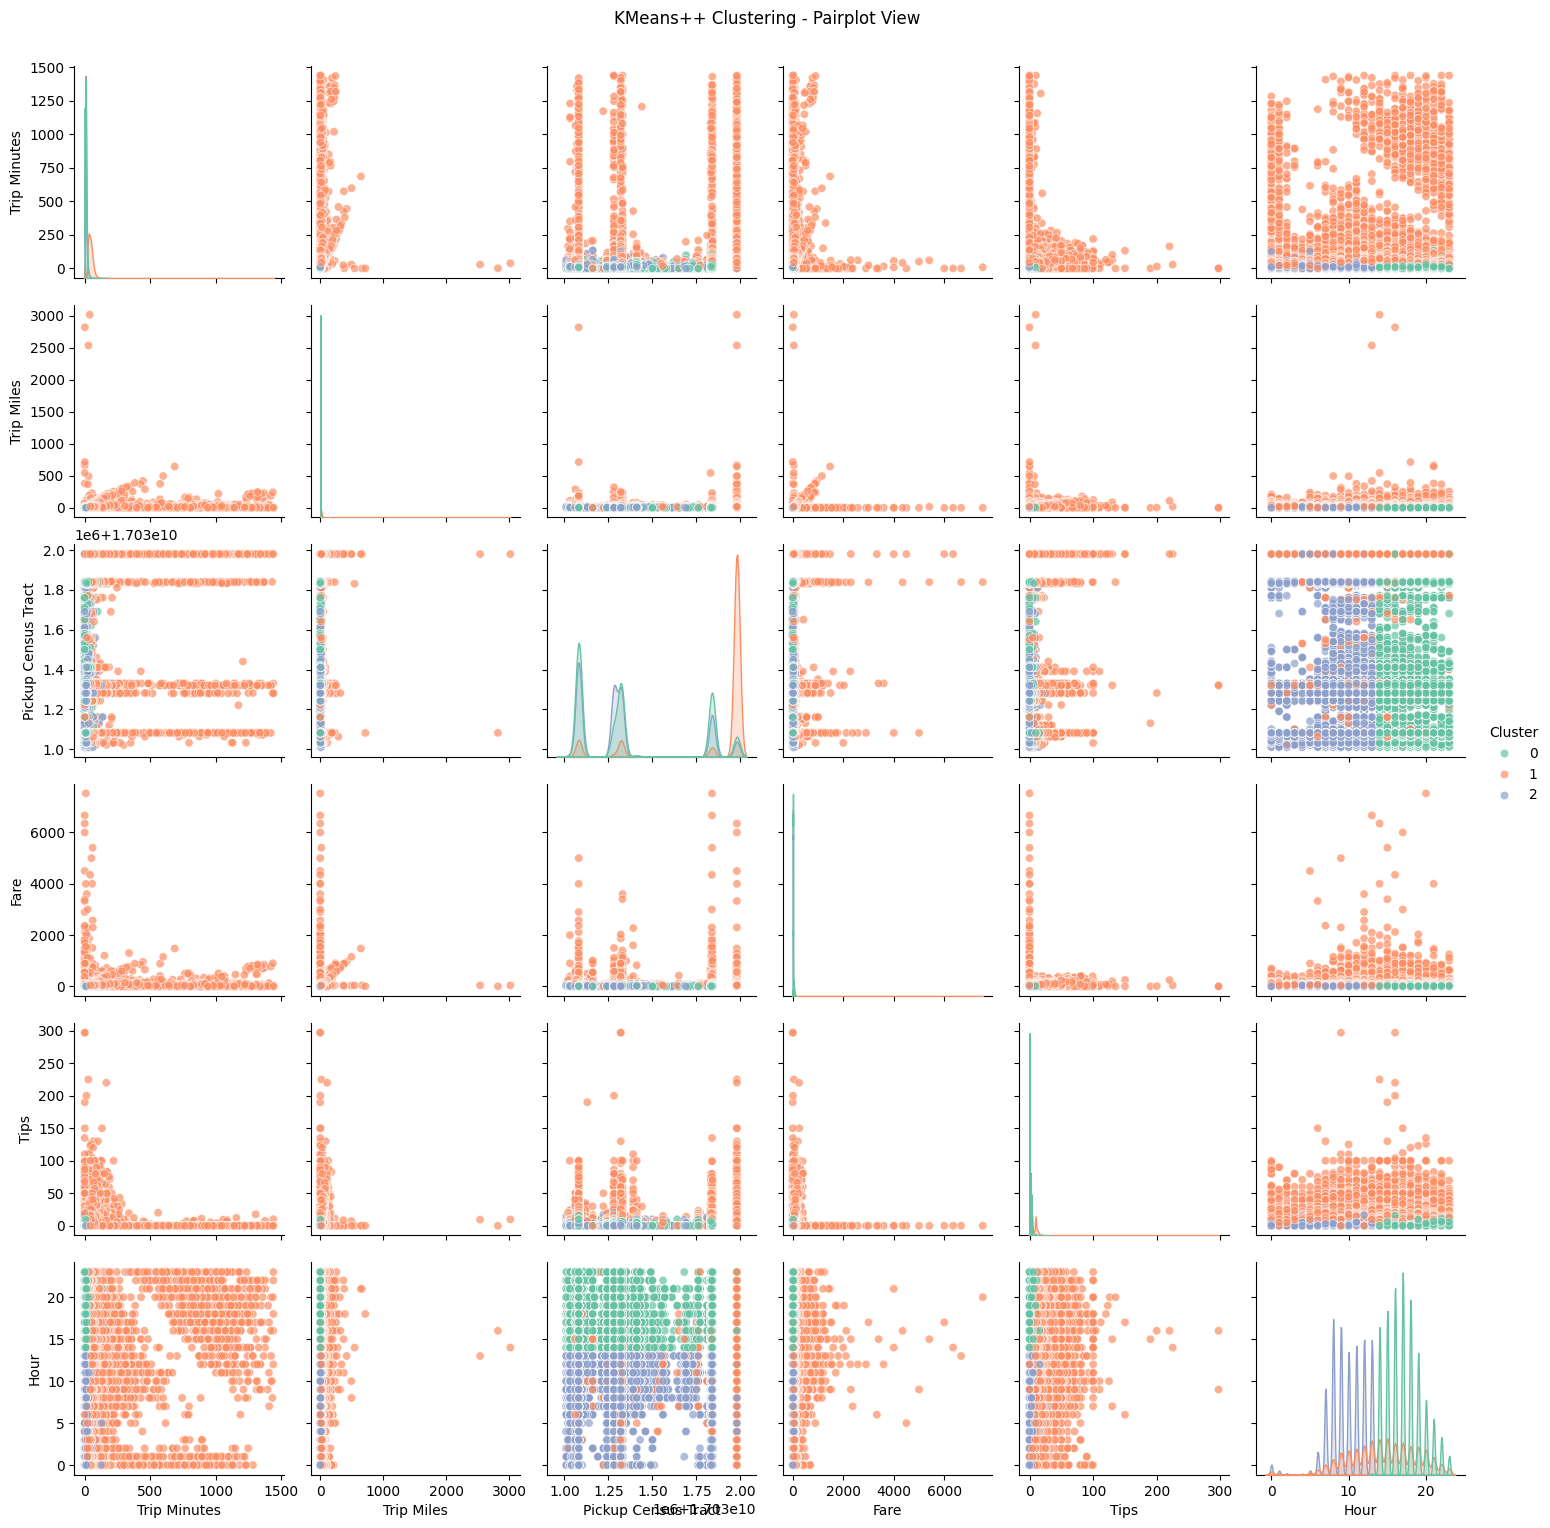

In [39]:
features = ['Trip Minutes', 'Trip Miles', 'Pickup Census Tract', 'Fare', 'Tips', 'Hour']
X = trips_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Apply KMeans++ ===
k = 3  # You can use elbow method to determine optimal k
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
trips_data['Cluster'] = kmeans.fit_predict(X_scaled)

# === Visualize with pairplot ===
sns.pairplot(trips_data, vars=features, hue='Cluster', palette='Set2', plot_kws={"alpha": 0.7})
plt.suptitle("KMeans++ Clustering - Pairplot View", y=1.02)
plt.show()

C:\Users\LIWFG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


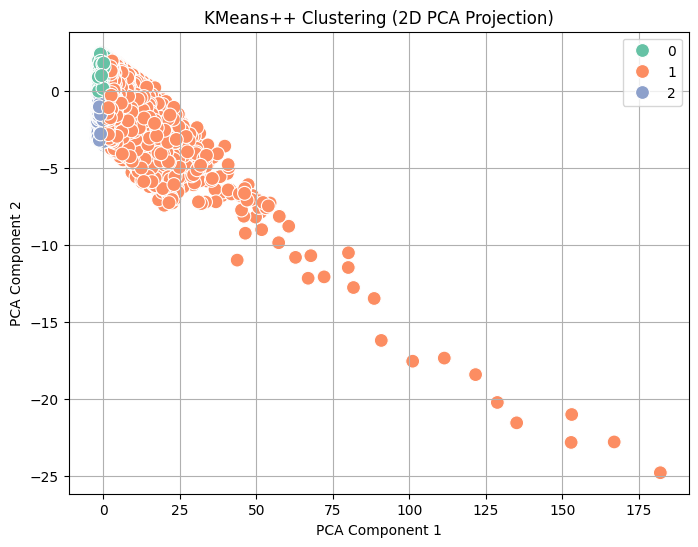

In [41]:
# === 2D PCA Plot for visual clustering ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
trips_data['PCA1'] = X_pca[:, 0]
trips_data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(trips_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("KMeans++ Clustering (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()